In [1]:
import numpy as np
import astropy.io.fits as fits
import astropy.io.ascii as ascii
from astropy.table import Table

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
allStar_file = fits.open('allStar-l31c.2.fits')
allStar_file.info()

Filename: allStar-l31c.2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1                1 BinTableHDU    439   277371R x 208C   [45A, 34A, 46A, 38A, 18A, 8A, I, 16A, E, E, E, E, E, E, D, D, D, D, J, J, J, 140A, 14A, 3J, J, J, I, E, J, 165A, J, 74A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, 2E, 2E, 2E, J, J, J, E, E, E, 5A, 4A, 6A, I, E, E, E, E, 9E, 9E, 81E, 81E, E, E, E, E, E, E, E, E, E, E, E, E, 5A, J, 183A, 9J, 26E, 26E, 26E, 26E, 26E, 26E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, 26E, 26J, 23A, 12A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 17A, E, E, I, I, E, E, 20A, 845A, 804A, 50J, 50J, 207E, 23E]   
  2                1 ImageHDU         6   (360,)   int32   
  3                1 BinTable

In [3]:
# getting data from HDU1
allStar_header = allStar_file[1].header
allStar_data = allStar_file[1].data

In [4]:
allStar_header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                 6136 /Number of bytes per row                         
NAXIS2  =               277371 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                  208 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [5]:
# Ursa Minor at Location ID 5118, and telluric standard stars
UMi_5118_contaminated = allStar_data[allStar_data.field('LOCATION_ID') == 5118]

In [6]:
# remove telluric standard stars
UMi_5118 = UMi_5118_contaminated[UMi_5118_contaminated.field('APOGEE2_TARGET2') & 2**9 == 0]

In [7]:
# create table
target_table = Table([UMi_5118['APOGEE_ID'], UMi_5118['RA'], UMi_5118['DEC'],
                      UMi_5118['J'], UMi_5118['H'], UMi_5118['K'], 
                      UMi_5118['GLON'], UMi_5118['GLAT'], UMi_5118['TEFF'],
                      UMi_5118['LOGG'], UMi_5118['FE_H'], 
                      UMi_5118['VHELIO_AVG'], UMi_5118['VSCATTER'],
                      UMi_5118['SNREV'], UMi_5118['NVISITS']],
                     names = ('APOGEE_ID', 'RA', 'DEC', 
                              'J', 'H', 'K', 
                              'GLON', 'GLAT', 'TEFF', 'LOGG', 'FE_H', 
                              'VHELIO_AVG', 'VSCATTER', 'SNREV', 'NVISITS'))

In [8]:
# original 276 stars
print(target_table)

    APOGEE_ID          RA        DEC      J    ... VSCATTER   SNREV    NVISITS
------------------ ---------- --------- ------ ... -------- ---------- -------
2M14595135+6701378 224.963996 67.027168 15.616 ...   1.2929  12.441612      24
2M14595456+6748385 224.977367 67.810699 15.147 ...  0.64912  52.293987      21
2M14595549+6647329 224.981235  66.79248 13.958 ...  4.46778    54.9663      24
2M15001275+6645246 225.053136 66.756836 12.254 ... 0.120291  125.93334      10
2M15004807+6806155 225.200332 68.104309 13.435 ...  0.36624   56.93443      10
2M15004909+6644105 225.204559 66.736252 16.034 ...  5.09971       -1.0      18
2M15015203+6706228 225.466811 67.106354 13.662 ... 0.489965   152.0521      28
2M15015367+6740519 225.473663 67.681099  15.24 ...  1.25545    51.8132      27
2M15015637+6644450 225.484909 66.745857 14.026 ... 0.839057   79.41525      25
2M15020469+6648554 225.519581 66.815399 14.112 ...  0.49547   67.85522      24
               ...        ...       ...    ... ...  

In [9]:
# ascii
ascii.write(target_table, 'target_table.txt', overwrite = True)

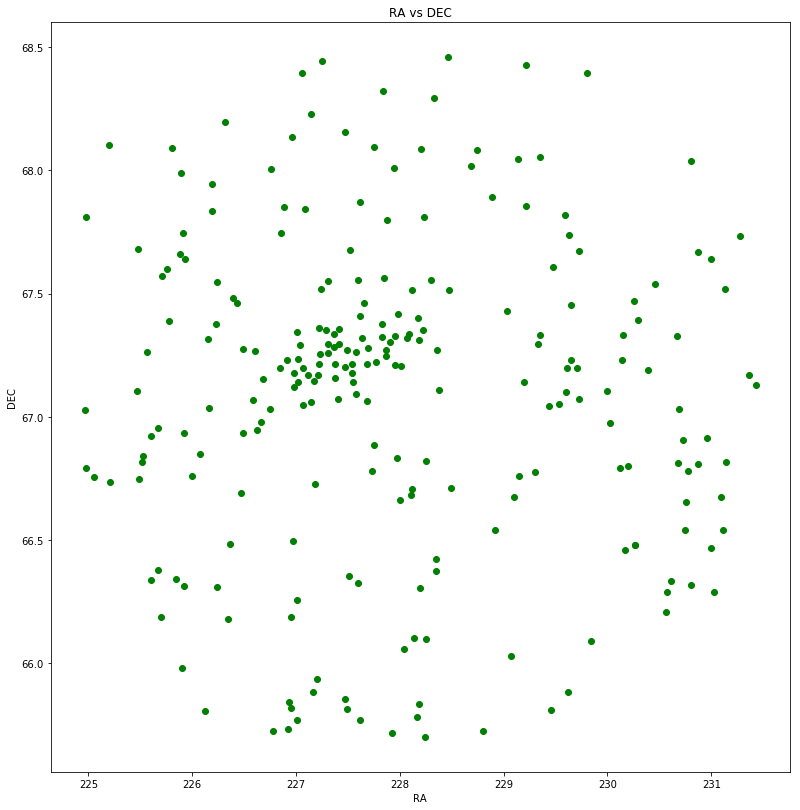

In [22]:
# plot RA, DEC
fig,ax = plt.subplots(1,1)                   
fig.set_size_inches(11,11)               

fig.tight_layout()                           

ax.set_xlabel("RA")
ax.set_ylabel("DEC")
ax.set_title("RA vs DEC")

x = target_table['RA']
y = target_table['DEC']

ax.scatter(x, y, c = "g");

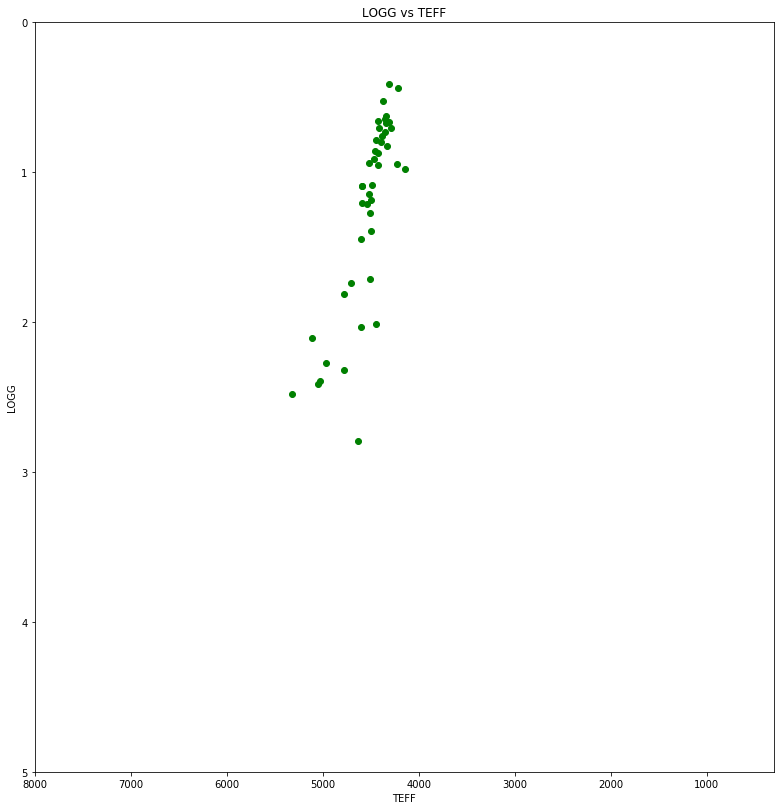

In [25]:
# plot log g, Teff
fig,ax = plt.subplots(1,1)                   
fig.set_size_inches(11,11)               

fig.tight_layout()  

ax.set_xlim(8000, 300)
ax.set_ylim(5, 0)

ax.set_xlabel("TEFF")
ax.set_ylabel("LOGG")
ax.set_title("LOGG vs TEFF")

x = target_table['TEFF']
y = target_table['LOGG']

ax.scatter(x, y, c = "g");

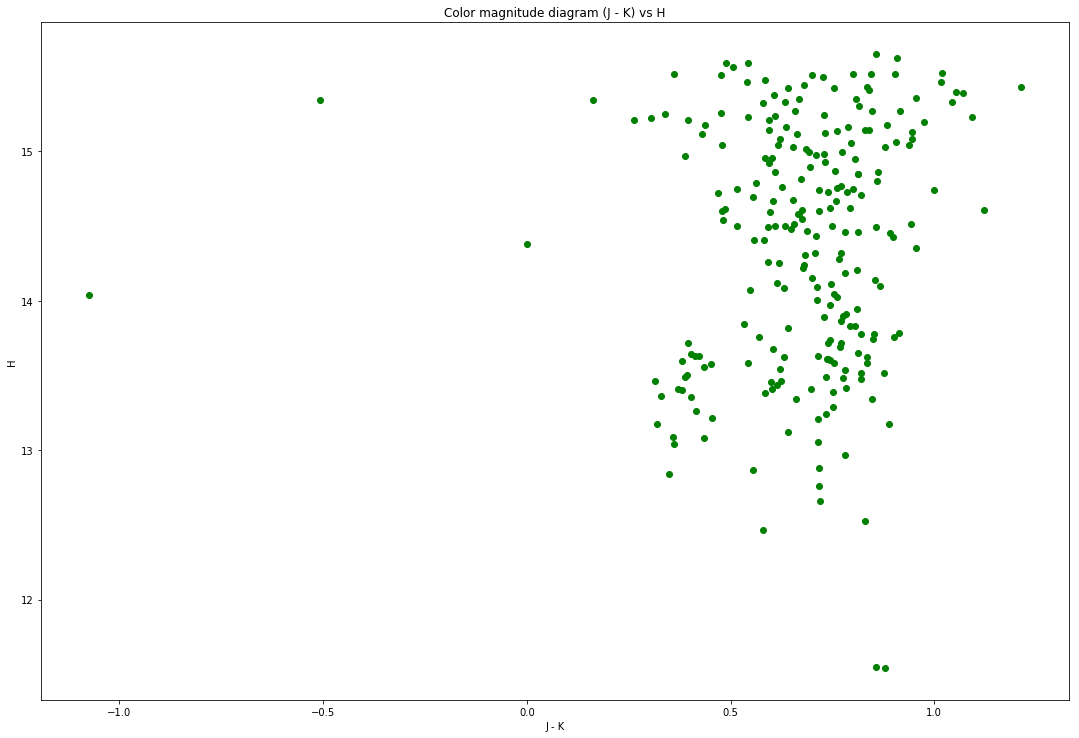

In [29]:
# plot log g, Teff
fig,ax = plt.subplots(1,1)                   
fig.set_size_inches(15,10)               

fig.tight_layout()  

ax.set_xlabel("J - K")
ax.set_ylabel("H")
ax.set_title("Color magnitude diagram (J - K) vs H")

jk = target_table['J'] - target_table['K']
h = target_table['H']

ax.scatter(jk, h, c = "g");